# ✅ Day 11 Challenge

##### 🔗 Dataset: "https://www.kaggle.com/datasets/saurabhshahane/data-science-jobs-salaries"

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [6]:
df = pd.read_csv("Data Science Jobs Salaries.csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S
...,...,...,...,...,...,...,...,...,...,...,...
240,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
241,2021e,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
242,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
243,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


# Pandas 

## Q1: Grouping and Aggregation: Group the dataset by company_location  and calculate the average Salary for each company. Then, filter out companies where the average salary is below 60,000.

In [27]:
avg_sal_company = df.groupby('company_location')['salary'].mean().sort_values(ascending = False).reset_index(name = 'avg_salary')
filtered_sal = avg_sal_company[avg_sal_company['avg_salary'] > 60000]
filtered_sal

,company_location,avg_salary
0,CL,3.040000e+07
1,HU,1.100000e+07
2,IN,2.037941e+06
3,AS,1.335000e+06
4,JP,1.238000e+06
5,CH,4.350000e+05
6,MX,3.890000e+05
7,US,2.866809e+05
8,CN,1.995000e+05
9,DK,1.850000e+05


# Q2: Handling Missing Data: Identify any missing values in the dataset and replace them with the median value of the respective column.

In [30]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# Exploratory Data Analysis (EDA)

## Q1: Salary Distribution: Plot a histogram of the Salary column to understand its distribution. Identify any skewness or outliers.

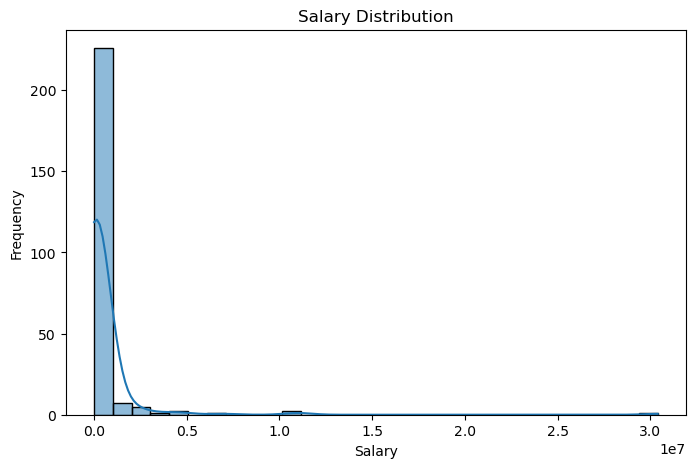

In [43]:
plt.figure(figsize = (8,5))
sns.histplot(data = df['salary'], bins = 30, kde = True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [49]:
df['salary'].skew()

10.346941222539135

## Q2: Correlation Analysis: Compute the correlation matrix for numerical columns and visualize it using a heatmap. Interpret the relationships between variables.

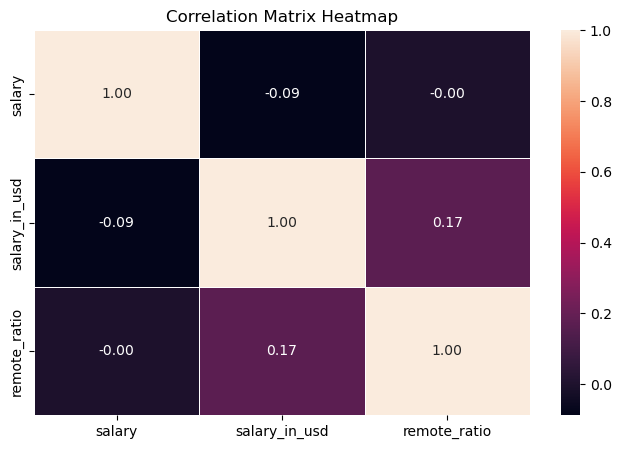

In [60]:
df_corr = df.corr(numeric_only = True)
df_corr

plt.figure(figsize = (8,5))
sns.heatmap(data = df_corr, annot = True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Visualization

## Q1: Salary vs. Experience: Create a scatter plot to visualize the relationship between Experience level and Salary. Add a regression line to indicate the trend.



In [65]:
df['experience_level'].unique()

array(['EN', 'SE', 'EX', 'MI'], dtype=object)

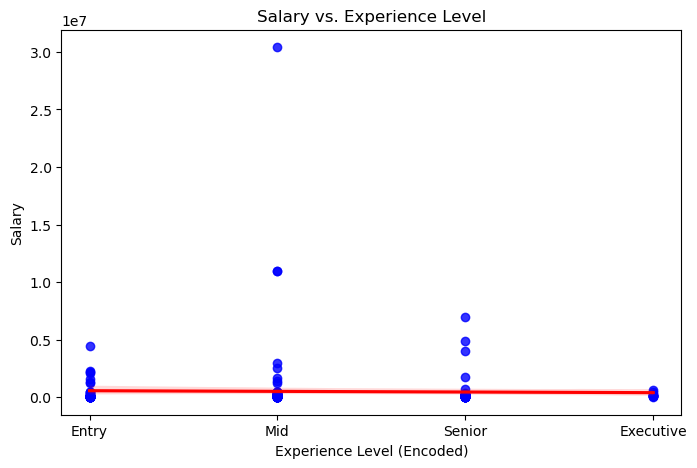

In [77]:
exp_map = {'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4}
df['exp_num'] = df['experience_level'].map(exp_map)

plt.figure(figsize = (8,5))
sns.regplot(data = df, x = 'exp_num', y = 'salary', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.title('Salary vs. Experience Level')
plt.xlabel('Experience Level (Encoded)')
plt.ylabel('Salary')

plt.xticks([1, 2, 3, 4], ['Entry', 'Mid', 'Senior', 'Executive'])
plt.show()

## Q3: Salary by Job Title: Plot a bar chart to show the average salary for each JobTitle.

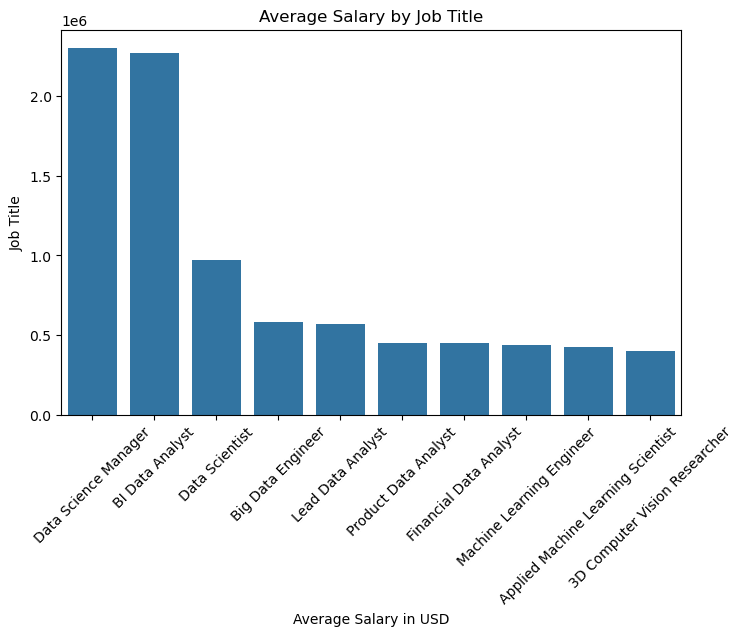

In [89]:
avg_salary_title = df.groupby('job_title')['salary'].mean().sort_values(ascending = False).reset_index(name = 'avg_sal').head(10)

plt.figure(figsize = (8,5))
sns.barplot(data = avg_salary_title, x = 'job_title', y = 'avg_sal')
plt.title('Average Salary by Job Title')
plt.xlabel('Average Salary in USD')
plt.ylabel('Job Title')
plt.xticks(rotation=45)
plt.show()

## Statistics

## Q1: Hypothesis Testing: Perform a one-sample t-test to determine if the average Salary is significantly different from 70,000. State the null and alternative hypotheses and interpret the results.

In [97]:
t_stat, p_val = stats.ttest_1samp(df['salary'], 70000)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-Value: {p_val:.4f}")

alpha = 0.05  

if p_val < alpha:
    print("Reject the null hypothesis (H₀): The average salary is significantly different from 70,000.")
else:
    print("Fail to reject the null hypothesis (H₀): No significant difference from 70,000.")


T-statistic: 2.9744
P-Value: 0.0032
Reject the null hypothesis (H₀): The average salary is significantly different from 70,000.
